<a href="https://colab.research.google.com/github/djbrady/computationalImaging/blob/master/forwardModels/wavelets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging
### David J. Brady
### University of Arizona

## Wavelets

This notebook supports ideas developed in Chapter 2 of *Computational Imaging*, focusing specifically on wavelet representations.

#### initialization code

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from skimage import io
import scipy.integrate as integrate
from google.colab import files
%matplotlib inline
import warnings
import scipy.integrate as integrate
import pywt



warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [20, 10]


## The Haar Wavelet

We consider the Haar scaling function 
$$
 \phi_{j,n}(x)={1\over \sqrt{2^j}}\beta^0 \left ({{x\over 2^j}-n}\right )
 $$
 and the Haar wavelet 
 $$
 \psi_{j,n} (x)=\phi_{j-1,n}(x)-\phi_{j-1,n+1}(x)
 $$
 

In [ ]:
def betab(x):
  b=(1.-np.sign(np.abs(x-.5)-.5))/2.
  return b
beta=np.vectorize(betab)
def phi(j,n,x):
  phib=beta(x/(2.**j)-n)/np.sqrt(2**j)
  return phib
def psi(j,n,x):
  psib=phi(j-1,n,x)-phi(j-1,n+1,x)
  return psib



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

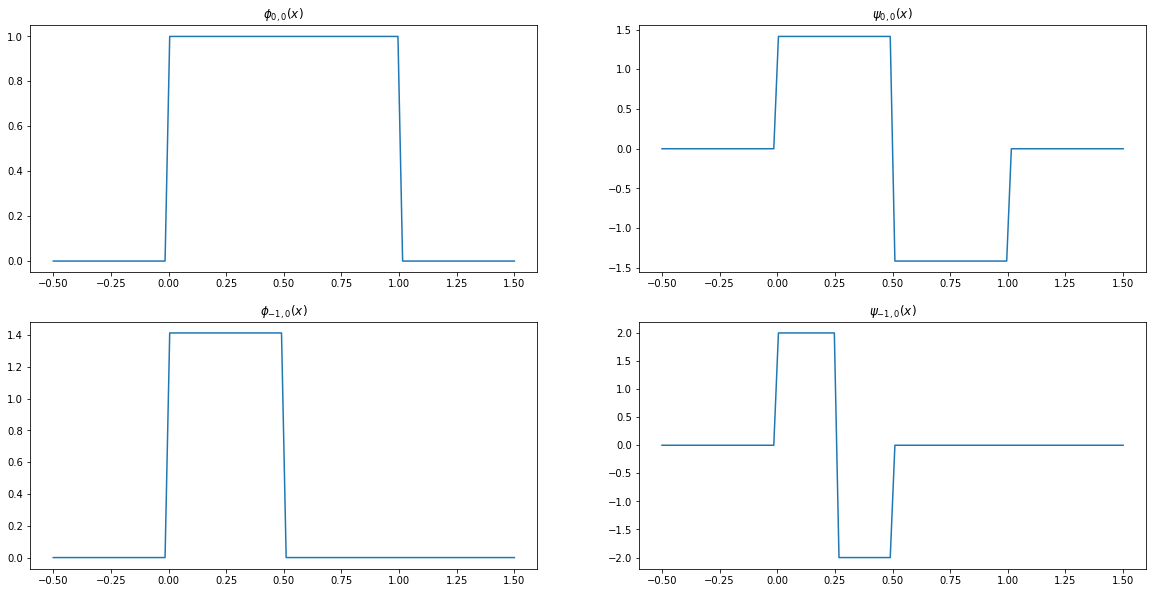

In [ ]:
xp=np.linspace(-.5,1.5,100)
plt.subplot(2,2,1)
plt.plot(xp,phi(0,0,xp))
plt.title("$\phi_{0,0}(x)$")
plt.subplot(2,2,2)
plt.plot(xp,psi(0,0,xp))
plt.title("$\psi_{0,0}(x)$")
plt.subplot(2,2,3)
plt.plot(xp,phi(-1,0,xp))
plt.title("$\phi_{-1,0}(x)$")
plt.subplot(2,2,4)
plt.plot(xp,psi(-1,0,xp))
plt.title("$\psi_{-1,0}(x)$")
plt.savefig('haarBasis.png')
files.download('haarBasis.png')

## Example projections

In [ ]:
xsize=10;
xrange=np.linspace(-xsize,xsize,1000)
def fx(x):
  fxx=np.exp(-0.05*np.pi*x**2)
  fxx=fxx*np.cos(2*np.pi*x/4.)
  return fxx
gx=np.vectorize(fx)
def fxHaar(levels=3):
  for level in np.arange(levels):
    haarCoeff=np.zeros(np.int(2.*xsize*(2**level)))
    for pop in np.arange(len(haarCoeff)):
      haarCoeff[pop]=(2.**level)*integrate.quad(gx,np.float((pop)*(1./(2.**level))-xsize),np.float((pop+1)*(1./(2.**level))-xsize))[0]
    def fp(x):
      fpp=haarCoeff[np.mod(np.int(np.floor((x+xsize)*(2**level))),len(haarCoeff))]
      return fpp
    gp=np.vectorize(fp)
    plt.subplot(levels,1,level+1)
    plt.subplots_adjust(hspace=1)
    plt.plot(xrange,gp(xrange),xrange,gx(xrange))
    plt.title('$f_{%d}(x)$' % -level)





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

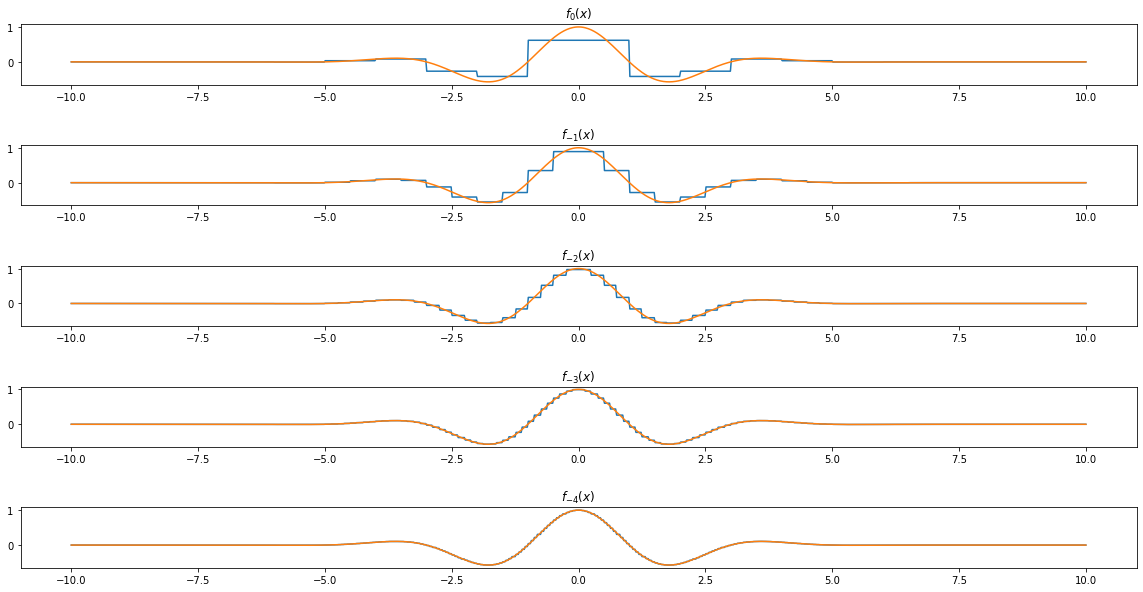

In [ ]:
fxHaar(5)
plt.savefig('haarSampling.png')
files.download('haarSampling.png')

In [ ]:
!wget https://raw.githubusercontent.com/djbrady/computationalImaging/master/images/dubaiBridge.jpg

--2020-11-19 10:54:02--  https://raw.githubusercontent.com/djbrady/computationalImaging/master/images/dubaiBridge.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2542532 (2.4M) [image/jpeg]
Saving to: ‘dubaiBridge.jpg’

dubaiBridge.jpg     100%[===================>]   2.42M  14.0MB/s    in 0.2s    

2020-11-19 10:54:02 (14.0 MB/s) - ‘dubaiBridge.jpg’ saved [2542532/2542532]



In [ ]:
pop=io.imread('dubaiBridge.jpg',as_gray=True)

In [ ]:
np.shape(pop)


(1868, 4000)

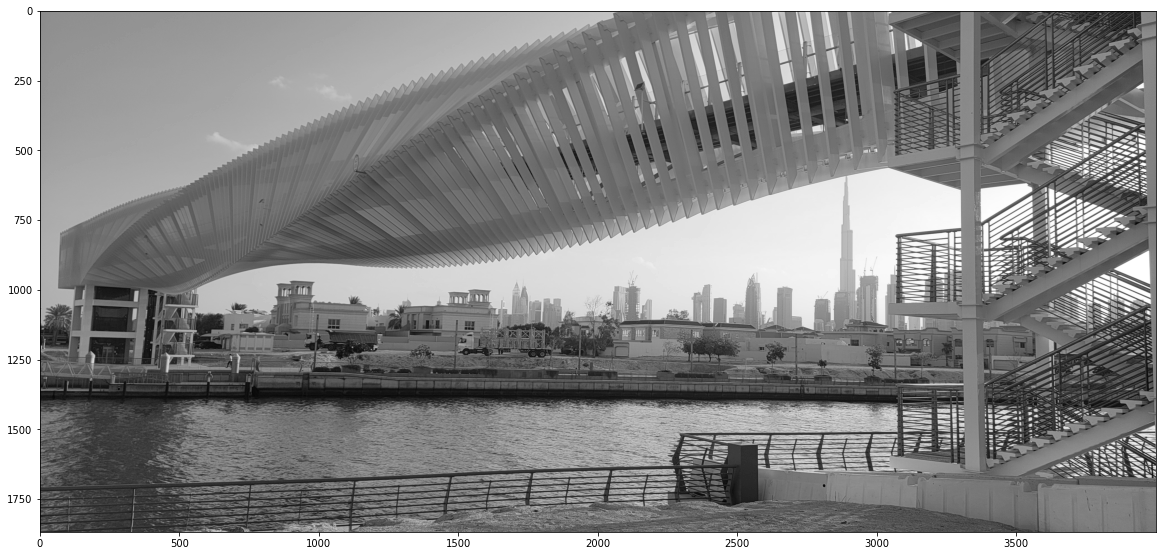

In [ ]:
plt.imshow(pop,cmap=plt.cm.gray)

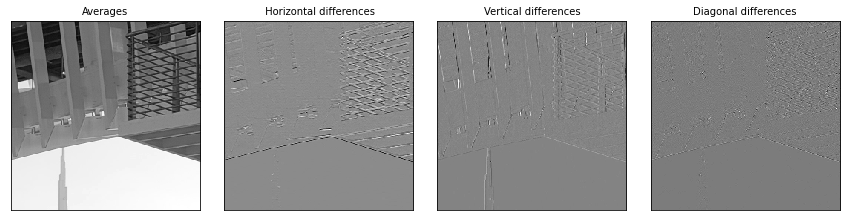

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Averages', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop[250:762,2750:3262], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()
plt.savefig('bridge1.png')
files.download('bridge1.png')

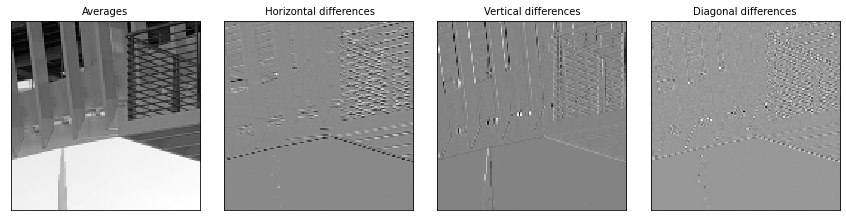

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Wavelet transform of image, and plot approximation and details
titles = ['Averages', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(LL, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()
plt.savefig('bridge2.png')
files.download('bridge2.png')

In [ ]:
np.shape(LL)

(128, 128)